# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import ModelClass as MC

# Question 1

To begin I've expanded the code from the assignment with an elif statement concerning the value of the sigma parameter. This allows us to see how the optimum changes, when both alpha and sigma varies. Using the Household class defined in the ModelClass.py, we can begin answering the questions.

In [3]:
# Importing class
q1 = MC.Household()

# Define lists for varying parameters
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1.,1.5]


# Nested looping over parameters
for alpha in alpha_vec:
    for sigma in sigma_vec:
        q1.par.alpha = alpha
        q1.par.sigma = sigma

        # Find optimal home labor supply 
        solve = q1.solve_discrete()

         
        # Print results
        print(f'alpha: {alpha}, sigma: {sigma} -> ratio: ({solve.HF/solve.HM})')


d:\Python\projects-2023-rpb672\inauguralproject\ModelClass.py:67: RuntimeWarning: divide by zero encountered in reciprocal
  H = ( (1-par.alpha)*HM**( (par.sigma-1)/par.sigma )+par.alpha*HF**( (par.sigma-1) /par.sigma) )**(par.sigma/(par.sigma-1))


alpha: 0.25, sigma: 0.5 -> ratio: (0.5454545454545454)
alpha: 0.25, sigma: 1.0 -> ratio: (0.3076923076923077)
alpha: 0.25, sigma: 1.5 -> ratio: (0.21428571428571427)
alpha: 0.5, sigma: 0.5 -> ratio: (1.0)
alpha: 0.5, sigma: 1.0 -> ratio: (1.0)
alpha: 0.5, sigma: 1.5 -> ratio: (1.0)
alpha: 0.75, sigma: 0.5 -> ratio: (1.8333333333333333)
alpha: 0.75, sigma: 1.0 -> ratio: (3.25)
alpha: 0.75, sigma: 1.5 -> ratio: (4.666666666666667)


Given that alpha is a measure of the relative productivity of the female in the household, it is expected that the ratio generally rises for a larger alpha. Sigma then is the elasticity of substitution between house work by the genders, such that the higher its value, the easier it is to change the distrubtion of home work between the genders. Thus when a gender is relatively better at housework than the other, a higher sigma will make that gender priotize working more at home. 

# Question 2

In order to be able to plot the findings in question 2, we utilize empty lists to store the ratios of interest. Lets proceed by setting up a new model:

In [4]:
# Defining a new model to reset parameters
q2 = MC.Household()

# Preparing lists for log wage and log ratio
logw = []
logr = []

# Loop over wF
for wF in q2.par.wF_vec:
    q2.par.wF = wF

    # Solve and append results to lists
    solve = q2.solve_discrete()
    logw.append(np.log(q2.par.wF/q2.par.wM))
    logr.append(np.log(solve.HF/solve.HM))
    
    # Print result
    print(f'wF: {wF}, wM: {q2.par.wM} -> ratio: ({solve.HF/solve.HM})')

wF: 0.8, wM: 1.0 -> ratio: (1.25)
wF: 0.9, wM: 1.0 -> ratio: (1.0)
wF: 1.0, wM: 1.0 -> ratio: (1.0)
wF: 1.1, wM: 1.0 -> ratio: (0.8888888888888888)
wF: 1.2, wM: 1.0 -> ratio: (0.8)


Above shows that when female wages increase, while male wages are kept constant, the ratio HF/HM falls, indicating that it is optimal for the male to spend more time working at home (given a high enough sigma, as seen above). Now lets illustrate this by plotting the ratios against eachother:

Text(0.5, 1.0, 'Discrete choice set')

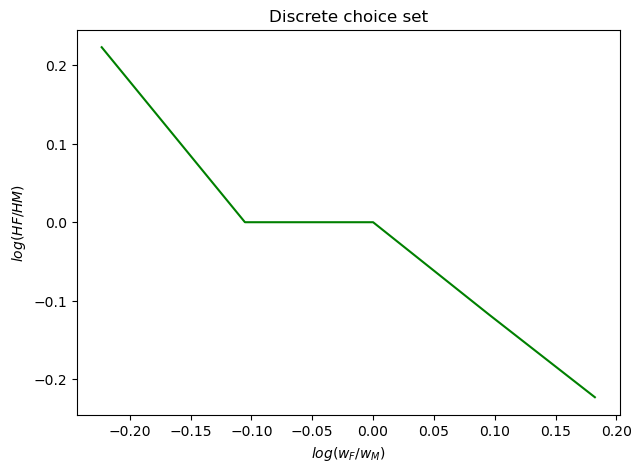

In [5]:
# Plot of the result

figure = plt.figure(figsize = (7,5))
ax = figure.add_subplot(1,1,1)
ax.plot(logw, logr, color = 'green')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(HF/HM)$')
ax.set_title('Discrete choice set')

From the figure above it appears that the ratio of HF/HM, how much the female works at home relative to the male, decreases as the ration of female-to-male wages increases. However, from wF=0.9 to 1 the ratio stays constant, creating a kink in our graph. This might be solved by moving into continous time. 

# Question 3

Following a similar procedure as in Qestion 2, the model can then be solved continuesly:

In [6]:
# Defining a new model to reset parameters
q3 = MC.Household()

# Preparing new lists for log wage and log ratio
logw_2 = []
logr_2 = []

# Setting up for loop to solve for the different wF values:
for wF in q3.par.wF_vec:
    q3.par.wF = wF

    res = q3.solve_con()
    logw_2.append(np.log(q3.par.wF/q3.par.wM))
    logr_2.append(np.log(res.HF/res.HM))

    print(f'wF: {wF}, wM: {q3.par.wM} -> ratio: ({res.HF/res.HM})')

wF: 0.8, wM: 1.0 -> ratio: (1.2499899080996033)
wF: 0.9, wM: 1.0 -> ratio: (1.1111228136132947)
wF: 1.0, wM: 1.0 -> ratio: (1.0000038970170104)
wF: 1.1, wM: 1.0 -> ratio: (0.9090889104209171)
wF: 1.2, wM: 1.0 -> ratio: (0.8333440913331054)


As can be seen from the print(), we seem to have eliminated the kink observed in question 2. In order to verify this, lets continue by plotting the two ratios again:

Text(0.5, 1.0, 'Continous choice set')

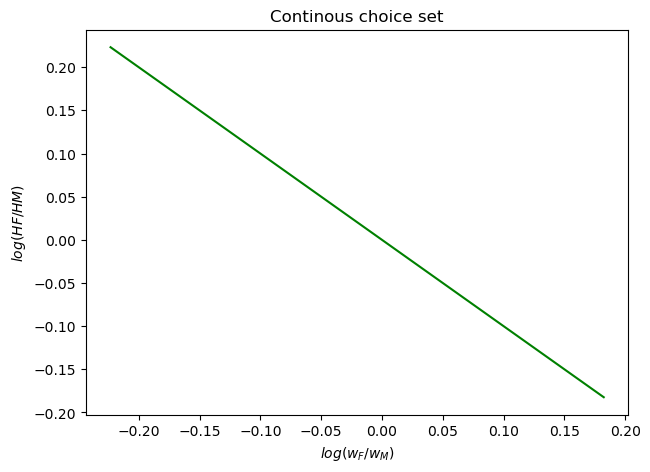

In [7]:
# Plot of the result

figure2 = plt.figure(figsize = (7,5))
ax = figure2.add_subplot(1,1,1)
ax.plot(logw_2, logr_2, color = 'green')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(HF/HM)$')
ax.set_title('Continous choice set')

And as expected, the graph is now a smooth line depicting a falling ratio of female-to-male hours worked at home, as the female wage rises relative to the male wage.

# Question 4

In what follows i attempt to minimize the sum of the squared differences between the model estimates and the findings in Siminski and Yetsenga (2022), i.e. choose an alpha and sigma with the lowest residual when comparing ratios of the log of Hf/Hm and wf/wm. To do this a regression is run on the estimates from the solve_wF_vec results, and the beta estimates are then used to calculate the deviation from the targets. Then the Nelder-Mead method is used to minimize this deviation by varying alpha and sigma. Last the function prints the optimal alpha and sigma, as well as the residual.

In [8]:
q4 = MC.Household()
q4.estimate()

d:\Python\projects-2023-rpb672\inauguralproject\ModelClass.py:67: RuntimeWarning: invalid value encountered in double_scalars
  H = ( (1-par.alpha)*HM**( (par.sigma-1)/par.sigma )+par.alpha*HF**( (par.sigma-1) /par.sigma) )**(par.sigma/(par.sigma-1))


Estimated alpha from data = 0.9820, and sigma = 0.1000. Deviation was = 3.105554714211381e-11


Text(0.5, 1.0, 'Question 4')

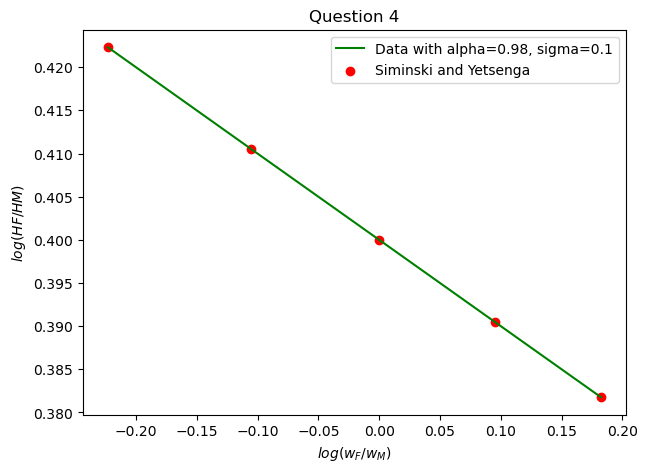

In [42]:
# Comparison of model data with Siminski and Yetsenka's findings.

#Store optimal alpha/sigma
q4.par.alpha = q4.sol.alpha
q4.par.sigma = q4.sol.sigma

# Preparing vector for storing log ratios and then solving the model with the stored values
q4.solve_wF_vec()
# Creating log vectors from results:
logH4 = np.log(q4.sol.HF_vec/q4.sol.HM_vec)
logw4 = np.log(q4.par.wF_vec)

# Defining the relationship found by Siminski and Yetsenka 

S_Y = q4.par.beta0_target+q4.par.beta1_target*logw4

# Plotting the results

figure3 = plt.figure(figsize = (7,5))
ax = figure3.add_subplot(1,1,1)
ax.plot(logw4, logH4, color = 'green', label = 'Data with alpha=0.98, sigma=0.1')
ax.scatter(logw4, S_Y, color = 'red', label = 'Siminski and Yetsenga')
ax.legend(loc='upper right')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(HF/HM)$')
ax.set_title('Question 4')

Thus we can see that the model fits their results well, given our efforts at optimizing alpha and sigma. We also see that even when the female has a way higher wage than the male, she will still do the biggest amount of housework. I.e. even when the (real) ratio of wF/wM is more than 1, the ratio HF/HM stays above 1 as well, indicating that the woman works more hours at home. This is in line with what could be expected since alpha=0.9 suggests that the female is also relatively more productive when doing housework, compared to the male.

# Question 5

To extent the model to fit Simminski and Yetsenka's proposed relationship when alpha=0.5, such that the genders are equally productive at home, I have added additional disutillity for female labor (away from home). Further, the function estimate_ext() minimizes the deviation as in Question 4, but this time by varying sigma and ext_F, which is the parameter that introduces additional female disutillity of labor:

In [49]:
q5 = MC.Household()
# Turn on extention
q5.par.extention = True
# Solve
q5.estimate_ext()


Estimated ext_F from data = 0.0114, and sigma = 0.7321 Deviation was = 0.0000


As can be seen, a rather small penalty for working away from home for the female is found. The high sigma of 0.7321 indicating a high elasticity of substitution between house work by the genders, allows this rather small penalty to be sufficient in making the female work the required amount at home, despite the equality of productivity in house work between the genders.

Text(0.5, 1.0, 'Question 5')

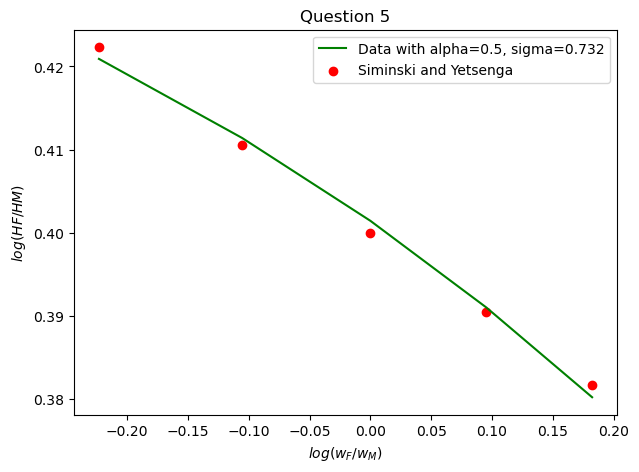

In [50]:
# Store solution
q5.par.sigma = q5.sol.sigma
q5.par.ext_F = q5.sol.ext_F

# Creating log vectors from solution
logH5 = np.log(q5.sol.HF_vec/q5.sol.HM_vec)
logw5 = np.log(q5.par.wF_vec)

# Plotting results
figure4 = plt.figure(figsize = (7,5))
ax = figure4.add_subplot(1,1,1)
ax.plot(logw5, logH5, color = 'green', label = 'Data with alpha=0.5, sigma=0.732')
ax.scatter(logw5, S_Y, color = 'red', label = 'Siminski and Yetsenga')
ax.legend(loc='upper right')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(HF/HM)$')
ax.set_title('Question 5')


The model data fits the Siminski and Yetsenga relationship well, although not as well as a deviation of 0 would suggest, which confuses this author a bit. However, the proposed extention seems to have done an all around good job.